In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [107]:
I = cv2.imread('forest.jpg')
histSize = 256
histRange = (0,256)
I_BGR = cv2.split(I)
bHist = cv2.calcHist(I_BGR, [0], None, [histSize], histRange)
gHist = cv2.calcHist(I_BGR, [1], None, [histSize], histRange)
rHist = cv2.calcHist(I_BGR, [2], None, [histSize], histRange)

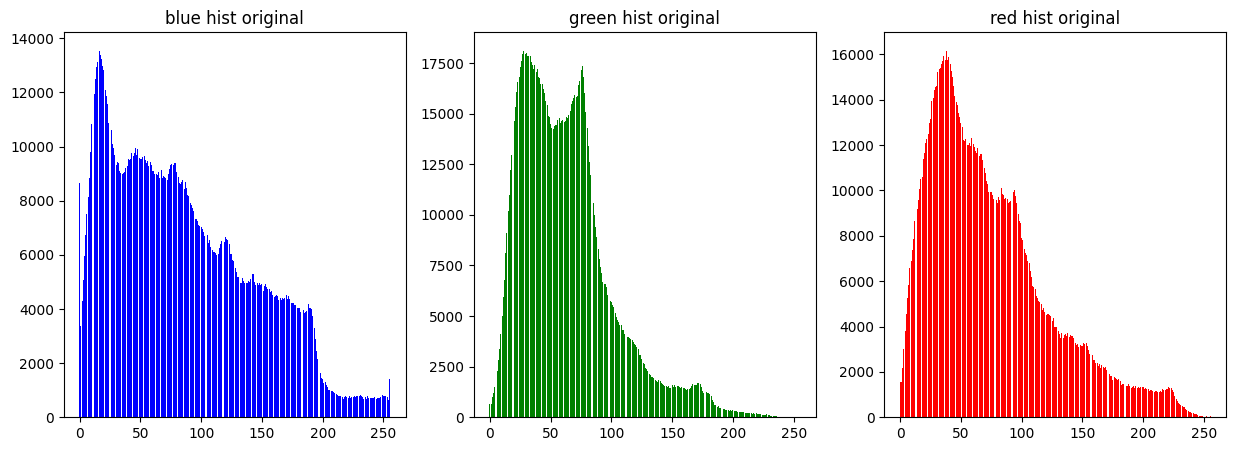

In [108]:
x = list(range(256))
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].bar(x, bHist[:,0], color='b')
ax[1].bar(x, gHist[:,0], color='g')
ax[2].bar(x, rHist[:,0], color='r')
ax[0].set_title('blue hist original')
ax[1].set_title('green hist original')
ax[2].set_title('red hist original')
plt.show()

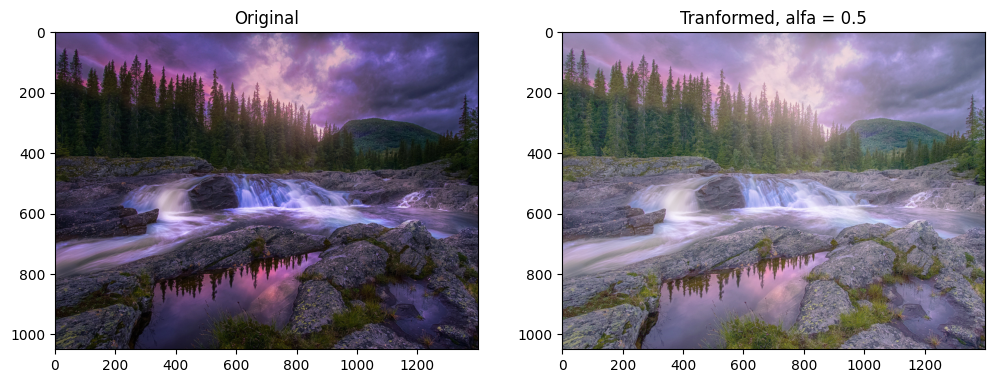

In [109]:
alfa = 0.5
# Convert to floating point
if I.dtype == np.uint8 :
    Inew = I.astype(np.float32) / 255
else :
    Inew = I

# We need to process layers separately
I_BGR = cv2.split(Inew)
Inew_BGR = []

for layer in I_BGR:
    Imin = layer.min()
    Imax = layer.max()
    Inew = np.clip(( ((layer - Imin) / (Imax - Imin)) ** alfa ), 0 , 1)
    Inew_BGR.append(Inew)
# Merge back
Inew = cv2.merge(Inew_BGR)
# Convert back to uint if needed
if (I.dtype == np.uint8):
    Inew = (255 * Inew).clip(0 , 255).astype(np.uint8)

f, ax = plt.subplots(1,2, figsize=(12,12))
ax[1].imshow(cv2.cvtColor(Inew, cv2.COLOR_BGR2RGB))
ax[1].set_title(f'Tranformed, alfa = {alfa}')
ax[0].imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original')
plt.show()

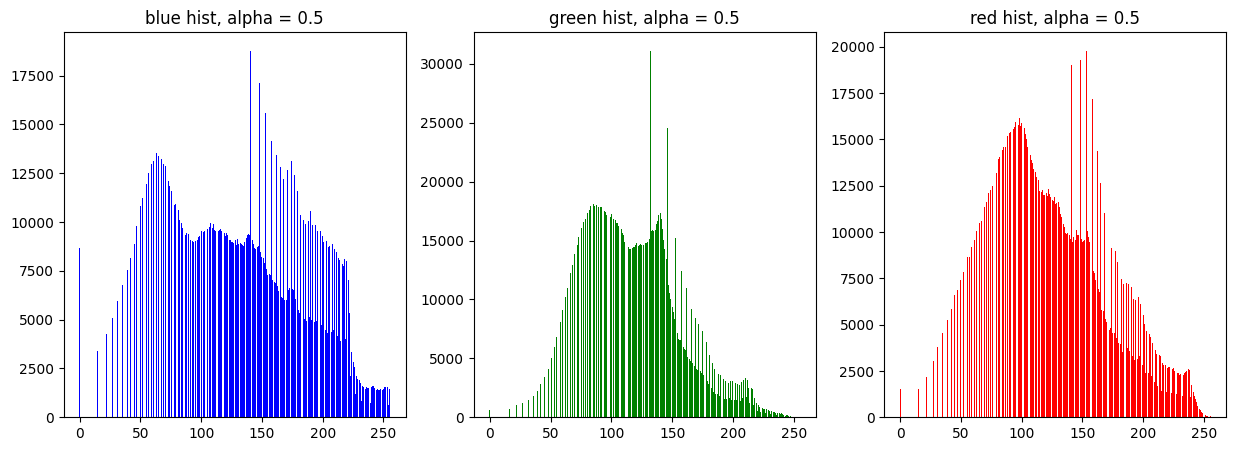

In [70]:
histSize = 256
histRange = (0,256)
I_BGR = cv2.split(Inew)
bHist_a = cv2.calcHist(I_BGR, [0], None, [histSize], histRange)
gHist_a = cv2.calcHist(I_BGR, [1], None, [histSize], histRange)
rHist_a = cv2.calcHist(I_BGR, [2], None, [histSize], histRange)
x = list(range(256))
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].bar(x, bHist_a[:,0], color='b')
ax[1].bar(x, gHist_a[:,0], color='g')
ax[2].bar(x, rHist_a[:,0], color='r')
ax[0].set_title(f'blue hist, alpha = {alfa}')
ax[1].set_title(f'green hist, alpha = {alfa}')
ax[2].set_title(f'red hist, alpha = {alfa}')
plt.show()

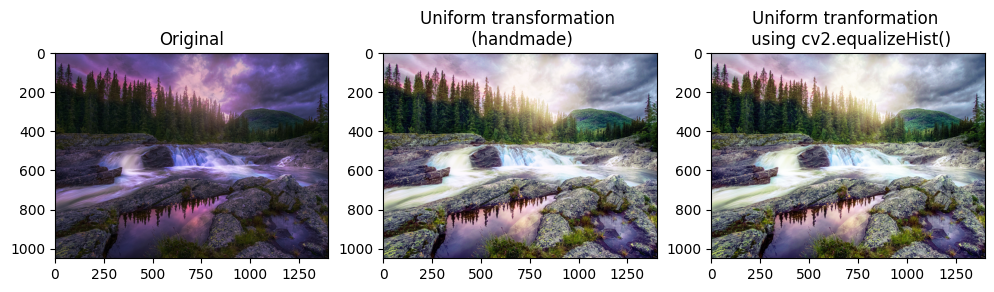

In [118]:
CHb = np.cumsum(bHist) / (I.shape[0] * I.shape[1])
CHb = CHb[:, np.newaxis].astype(np.float32)
CHg = np.cumsum(gHist) / (I.shape[0] * I.shape[1])
CHg = CHg[:, np.newaxis].astype(np.float32)
CHr = np.cumsum(rHist) / (I.shape[0] * I.shape[1])
CHr = CHr[:, np.newaxis].astype(np.float32)
CH = np.concatenate([CHb, CHg, CHr], axis=1)

I = cv2.imread('forest.jpg')
if I.dtype == np.uint8 :
    I = I.astype(np.float32) / 255

#split images
I_BGR = cv2.split(I)
Inew_BGR = []
Inew_BGR_cv = []

for i, layer in enumerate(I_BGR):
    Imin = layer.min()
    Imax = layer.max()
    Inew = np.clip((Imax-Imin)*CH[(np.round(layer*255, 0).astype(np.uint8)),i]+Imin, 0, 1)
    Inew_BGR.append(Inew)
    I_new_cv = cv2.equalizeHist((np.round(layer*255, 0).astype(np.uint8)))
    Inew_BGR_cv.append(I_new_cv)

# Merge back
Inew = cv2.merge(Inew_BGR)
Inew_cv = cv2.merge(Inew_BGR_cv)

#visualization
f, ax = plt.subplots(1,3, figsize=(12,12))
ax[0].imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[1].imshow(cv2.cvtColor(Inew, cv2.COLOR_BGR2RGB))
ax[1].set_title(f'Uniform transformation \n (handmade)')
ax[2].imshow(cv2.cvtColor(Inew_cv, cv2.COLOR_BGR2RGB))
ax[2].set_title('Uniform tranformation \n using cv2.equalizeHist()')
plt.show()

Text(0.5, 1.0, 'clahe gray-scaled image')

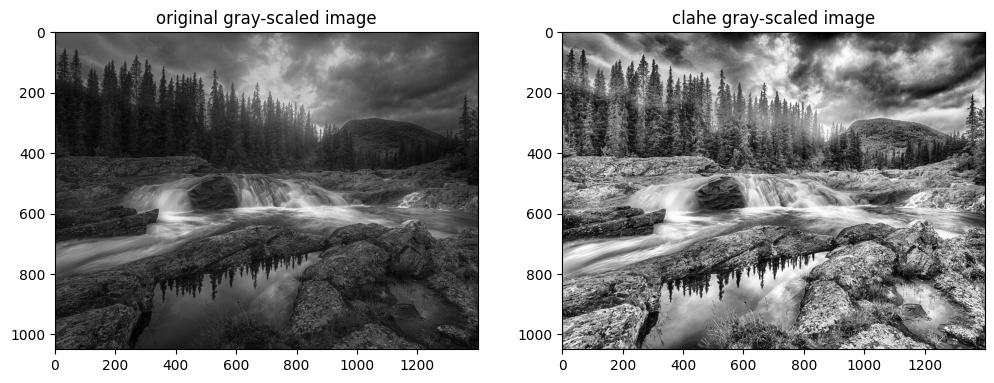

In [12]:
image = cv2.imread('forest.jpg', cv2.IMREAD_GRAYSCALE)

# Создайте объект CLAHE с определенными параметрами
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))

# Примените CLAHE к изображению
clahe_image = clahe.apply(image)

# Показать результат
f, ax = plt.subplots(1,2, figsize=(12,12))
ax[0].imshow(image, cmap='gray')
ax[1].imshow(clahe_image, cmap='gray')
ax[0].set_title('original gray-scaled image')
ax[1].set_title('clahe gray-scaled image')

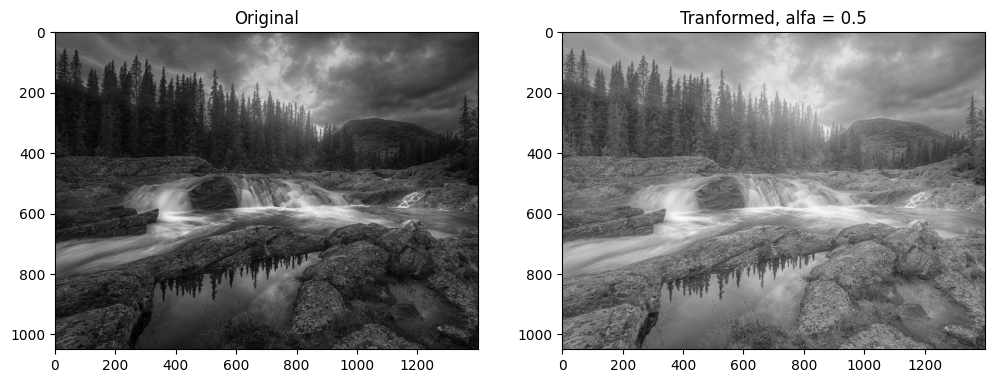

In [3]:
image = cv2.imread('forest.jpg', cv2.IMREAD_GRAYSCALE)

alfa = 0.5
lut = np.arange(256, dtype = np.uint8)

Imin = image.min()
Imax = image.max()
lut = (lut - Imin) / (Imax - Imin)
lut = np.where(lut > 0, lut, 0)
lut = np.clip(255 * np.power(lut, alfa), 0, 255)
image_ts = cv2.LUT(image, lut)

f, ax = plt.subplots(1,2, figsize=(12,12))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(image_ts, cmap='gray')
ax[1].set_title(f'Tranformed, alfa = {alfa}')
plt.show()

In [9]:
np.array([10]).astype(np.uint8) / 5

array([2.])

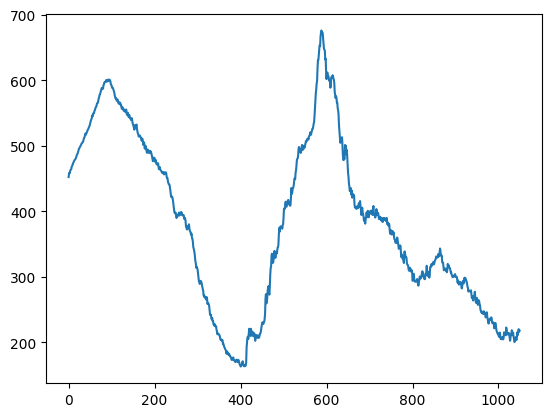

In [3]:
# Calculate projection to Oy
I = cv2.imread('forest.jpg', cv2.IMREAD_GRAYSCALE)
if I.ndim == 2:
    ProjI = np.sum (I , 1) / 255
else :
    ProjI = np.sum (I , (1 , 2)) / 255 / I.shape [2]
# Create graph image
#ProjI = np.full((256, ProjI.shape[0], 3) ,255, dtype=np.uint8)
#ProjI = cv2.transpose(ProjI)
#ProjI = cv2.flip(ProjI , 1)
# And display it
plt.plot(ProjI)
